In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from fxpmath import Fxp

In [2]:
fpath_tb_image_bin = os.path.join("tb_data", "tb_image_50x80_ap_fixed_16_2.bin")
fpath_tb_image_float = os.path.join("tb_data", "tb_image_50x80_float32.npy")
fpath_input_copy = os.path.join("tb_data", "tb_image_READ_IN_50x80_ap_fixed_16_2.bin")

# Load testbench data 

from binary

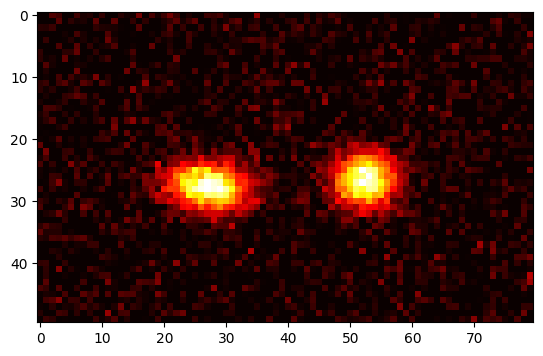

In [3]:
ap_fixed_16_2_example = Fxp(0.1, signed=True, n_word=16, n_frac=14)

tb_image = np.zeros((50*80), dtype=np.float32)
with open(fpath_tb_image_bin, 'rb') as f:
    # x = Fxp('0b' + f.read())
    for i, line in enumerate(f.readlines()):
        # x = Fxp('0b' + line)
        x = str(line)
        x = x.replace("\\r\\n", "")
        x = x.replace("b'", "")
        x = x.replace("'", "")
        x = Fxp('0b' + x, like = ap_fixed_16_2_example)
        tb_image[i] = x

tb_image = tb_image.reshape((50,80))
plt.imshow(tb_image, cmap='hot')


# Load the data that was read by verilog module

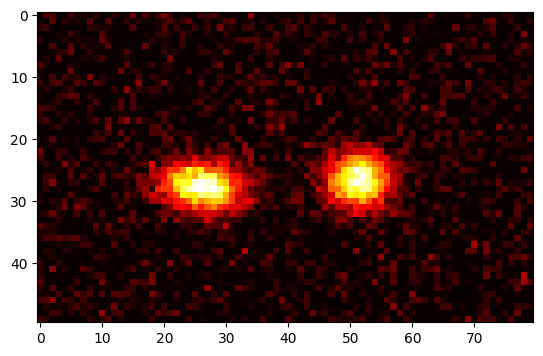

In [6]:
n_x_read = 0

tb_image_read = np.zeros((50*80), dtype=np.float32)
with open(fpath_input_copy, 'rb') as f:
    for i, line in enumerate(f.readlines()):
        if "x" in str(line):
            n_x_read += 1
            continue
        x = str(line)
        x = x.replace("\\n", "")
        x = x.replace("b'", "")
        x = x.replace("'", "")
        x = Fxp('0b' + x, like = ap_fixed_16_2_example)
        tb_image_read[i] = x

tb_image_read = tb_image_read.reshape((50,80))
plt.imshow(tb_image_read, cmap='hot')

In [7]:
n_x_read

3

Beautiful - so we're reading in the data correctly. 

In [5]:
x.replace("r", "")

AttributeError: 'Fxp' object has no attribute 'replace'